In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('./PatientTreatment/training_set.csv')
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [86]:
print("Number of instances: ", len(df))
print("There are missing values: ", df.isnull().values.any())
print(df['SOURCE'].value_counts())
print(len(df['AGE'].unique()))

Number of instances:  3309
There are missing values:  False
0    1992
1    1317
Name: SOURCE, dtype: int64
95


<AxesSubplot:>

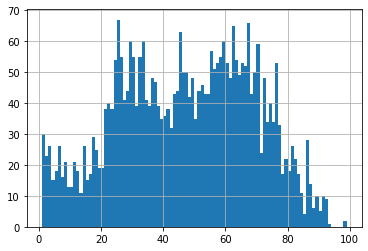

In [87]:
df['AGE'].hist(bins=98)

In [88]:
age_group = pd.cut(df['AGE'], bins=10)

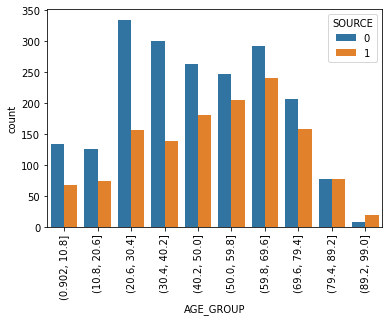

In [89]:
df['AGE_GROUP'] = age_group
sns.countplot(x='AGE_GROUP', hue='SOURCE', data=df)
plt.xticks(rotation=90)
plt.show()



<AxesSubplot:xlabel='SEX', ylabel='count'>

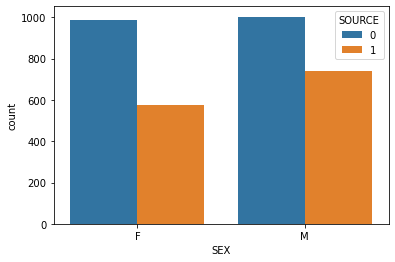

In [90]:
sns.countplot(x='SEX', hue='SOURCE', data=df)

<AxesSubplot:>

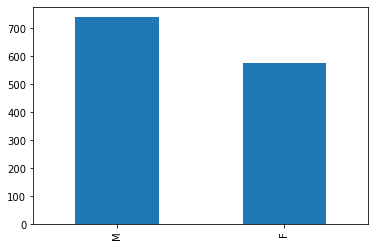

In [91]:
df.loc[df['SOURCE']==1, 'SEX'].value_counts().plot(kind='bar')

In [92]:
pd.pivot_table(df, values='SOURCE', columns='SEX', index='AGE_GROUP', aggfunc='count')

SEX,F,M
AGE_GROUP,,
"(0.902, 10.8]",96,105
"(10.8, 20.6]",92,108
"(20.6, 30.4]",247,245
"(30.4, 40.2]",228,211
"(40.2, 50.0]",209,236
"(50.0, 59.8]",193,259
"(59.8, 69.6]",242,291
"(69.6, 79.4]",153,211
"(79.4, 89.2]",83,73


In [93]:
df = pd.read_csv('./PatientTreatment/training_set.csv')
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0
...,...,...,...,...,...,...,...,...,...,...,...
3304,39.0,13.2,4.45,4.0,50,29.7,33.8,87.6,45,M,1
3305,25.4,8.2,3.27,5.4,90,25.1,32.3,77.7,1,F,1
3306,38.2,12.4,4.40,8.4,328,28.2,32.5,86.8,64,M,0
3307,43.4,15.2,5.29,10.1,326,28.7,35.0,82.0,33,M,0


In [94]:
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

le = preprocessing.LabelEncoder()
df['SEX']= le.fit_transform(df['SEX'])
data_text= df.drop('SOURCE', axis=1)
data_label = df['SOURCE']

X_train, X_test, y_train, y_test = train_test_split(data_text, data_label, test_size=0.2, random_state=42)

Accuracy score of Decision Tree train:  1.0
Accuracy score of Decision Tree:  0.6691842900302115
Accuracy score of Logistic Regression train:  0.7193048734416321
Accuracy score of Logistic Regression:  0.6978851963746223
Accuracy score of Dummy Classifier train:  0.6044578768417076
Accuracy score of Dummy Classifier:  0.5921450151057401


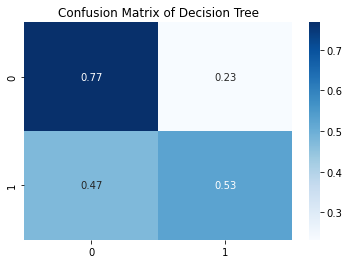

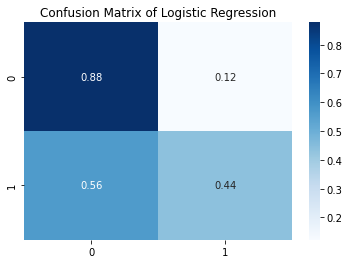

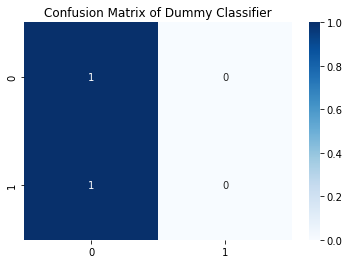

In [95]:
tree = DecisionTreeClassifier()
logReg = LogisticRegression(solver='liblinear')
dummy = DummyClassifier(strategy='most_frequent')

tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Accuracy score of Decision Tree train: ", accuracy_score(y_train, tree.predict(X_train)))
print("Accuracy score of Decision Tree: ", accuracy_score(y_test, y_pred_tree))

logReg.fit(X_train, y_train)
y_pred_log = logReg.predict(X_test)
print("Accuracy score of Logistic Regression train: ", accuracy_score(y_train, logReg.predict(X_train)))
print("Accuracy score of Logistic Regression: ", accuracy_score(y_test, y_pred_log))

dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print("Accuracy score of Dummy Classifier train: ", accuracy_score(y_train, dummy.predict(X_train)))
print("Accuracy score of Dummy Classifier: ", accuracy_score(y_test, y_pred_dummy))

cm_tree = confusion_matrix(y_test, y_pred_tree, labels = tree.classes_, normalize='true')
cm_log = confusion_matrix(y_test, y_pred_log, normalize='true')
cm_dummy = confusion_matrix(y_test, y_pred_dummy, normalize='true')

sns.heatmap(cm_tree, annot=True, cmap='Blues')
plt.title('Confusion Matrix of Decision Tree')
plt.show()
sns.heatmap(cm_log, annot=True, cmap='Blues')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()
sns.heatmap(cm_dummy, annot=True, cmap='Blues')
plt.title('Confusion Matrix of Dummy Classifier')
plt.show()

In [96]:
from sklearn.model_selection import cross_val_score

scores_tree = cross_val_score(tree, data_text, data_label, cv=10)
scores_log = cross_val_score(logReg, data_text, data_label, cv=10)
scores_dummy = cross_val_score(dummy, data_text, data_label, cv=10)

print("Accuracy score of Decision Tree: %0.2f (+/- %0.2f)" % (scores_tree.mean(), scores_tree.std() * 2))
print("Accuracy score of Logistic Regression: %0.2f (+/- %0.2f)" % (scores_log.mean(), scores_log.std() * 2))
print("Accuracy score of Dummy Classifier: %0.2f (+/- %0.2f)" % (scores_dummy.mean(), scores_dummy.std() * 2))


Accuracy score of Decision Tree: 0.67 (+/- 0.05)
Accuracy score of Logistic Regression: 0.72 (+/- 0.04)
Accuracy score of Dummy Classifier: 0.60 (+/- 0.00)


In [97]:
tree= DecisionTreeClassifier(criterion='entropy', max_features=10, min_samples_split=10)
scores = cross_val_score(tree, data_text, data_label, cv=10)
print("Accuracy score of Decision Tree: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy score of Decision Tree: 0.67 (+/- 0.06)


In [98]:
discretiz= preprocessing.KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
max_abs_scaler = preprocessing.MaxAbsScaler()


data_text['AGE']= discretiz.fit_transform(data_text['AGE'].values.reshape(-1,1))
data_text['THROMBOCYTE']= discretiz.fit_transform(data_text['THROMBOCYTE'].values.reshape(-1,1))
data_text = max_abs_scaler.fit_transform(data_text)

Accuracy score of Decision Tree: 0.66 (+/- 0.07)


In [99]:
scores_tree = cross_val_score(tree, data_text, data_label, cv=10)
print("Accuracy score of Decision Tree: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores_log = cross_val_score(logReg, data_text, data_label, cv=10)
print("Accuracy score of Logistic Regression: %0.2f (+/- %0.2f)" % (scores_log.mean(), scores_log.std() * 2))

Accuracy score of Decision Tree: 0.66 (+/- 0.07)
Accuracy score of Logistic Regression: 0.70 (+/- 0.04)


In [ ]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('age_discr', preprocessing.KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform'), ('THROMBOCYTE_discr', preprocessing.KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')))], remainder='passthrough')
pipeline